# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import collections
import datetime

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

### Step 4.  Check out the type of the columns

In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.0+ KB


### Step 5. Transform the Date column as a datetime type

In [4]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [5]:
apple = apple.set_index('Date')

### Step 7.  Is there any duplicate dates?

In [6]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [7]:
apple.sort_index(ascending = True, inplace = True)

### Step 9. Get the last business day of each month

In [9]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [10]:
apple['date'] = apple.index

In [11]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close,date
Date,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,1980-12-12
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,1980-12-15
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980-12-16
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980-12-17
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980-12-18


In [15]:
apple['date'].describe()

count                    8465
unique                   8465
top       1989-12-27 00:00:00
freq                        1
first     1980-12-12 00:00:00
last      2014-07-08 00:00:00
Name: date, dtype: object

In [25]:
q1 = apple[(apple['date'] >= '1981-01-01') & (apple['date'] <= '1981-03-31')].copy()

In [56]:
q1['day'] = q1['date'].resample('M').max()

In [64]:
q1.resample('M').max()

,Open,High,Low,Close,Volume,Adj Close,date
Date,,,,,,,
1981-01-31,34.50,34.75,34.50,34.50,13921600,0.54,1981-01-30
1981-02-28,28.75,28.87,28.75,28.75,6966400,0.45,1981-02-27
1981-03-31,26.75,27.00,26.75,26.75,57825600,0.42,1981-03-31


In [67]:
q1['day'] = q1['date'].apply(lambda x: x.day)

In [167]:
fb = pd.DataFrame(q1['date'])

In [168]:
fb = fb.append(fb).append(fb).append(fb).append(fb).append(fb).append(fb).append(fb).append(fb).append(fb).append(fb).append(fb).append(fb)

In [169]:
fb.shape[0]

806

In [170]:
import random

In [171]:
userid = pd.Series([random.randint(1234, 1250) for x in range(0,fb.shape[0])])

In [172]:
fb['userid'] = userid.values

In [173]:
fb.head()

,date,userid
Date,,
1981-01-02,1981-01-02,1248
1981-01-05,1981-01-05,1250
1981-01-06,1981-01-06,1241
1981-01-07,1981-01-07,1235
1981-01-08,1981-01-08,1242


In [174]:
#Filter for last seven days of the week
last_week = fb.loc['1981-01-02':'1981-01-08'].copy()

In [175]:
#extract day
last_week['day'] = last_week.index.day

In [176]:
#remove duplicates
last_week.drop_duplicates(['userid', 'day'], inplace=True)

In [177]:
day_count = last_week.groupby('userid').count()

In [178]:
day_count

,date,day
userid,,
1234,2,2
1235,3,3
1236,4,4
1237,3,3
1238,3,3
1239,4,4
1240,2,2
1241,4,4
1242,2,2


In [179]:
day_count.drop

,date,day
userid,,
1244,5,5


### Step 10.  What is the difference in days between the first day and the oldest

In [27]:
apple.index[0] - apple.index[-1]

Timedelta('-12261 days +00:00:00')

### Step 11.  How many months in the data we have?

In [35]:
len(apple.resample('BM').mean())

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

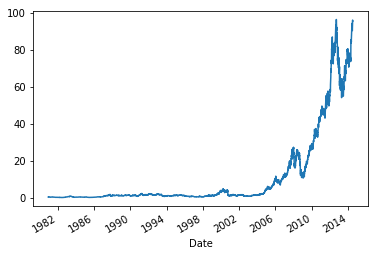

In [52]:
apple['Adj Close'].plot()

### BONUS: Create your own question and answer it.